<a href="https://colab.research.google.com/github/alizul01/2141720088-PCVK-2023/blob/main/Jobsheet_6_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram

## Library

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Method

In [58]:
def load_image(file_path):
    img = cv2.imread(file_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def plot_histogram(img, title):
    r_hist, r_bins = np.histogram(img[:, :, 0], bins=256, range=[0, 256])
    g_hist, g_bins = np.histogram(img[:, :, 1], bins=256, range=[0, 256])
    b_hist, b_bins = np.histogram(img[:, :, 2], bins=256, range=[0, 256])

    names = np.arange(256)
    fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle(title)
    fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0].bar(names, r_hist, color='red')
    axs[1].bar(names, g_hist, color='green')
    axs[2].bar(names, b_hist, color='blue')

def plot_histogram(hist, title):
    names = np.arange(256)
    fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle(title)
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0].bar(names, hist[2], color='red')
    axs[1].bar(names, hist[1], color='green')
    axs[2].bar(names, hist[0], color='blue')

def equalize_histogram(img):
    vals = img.mean(axis=2).flatten()
    counts, bins = np.histogram(vals, range(257))
    chistogram_array = np.cumsum(counts) / np.sum(counts)
    transform_map = (255 * chistogram_array).astype(np.uint8)

    eq_img_list = [transform_map[p] for p in img.flatten()]
    eq_img_array = np.reshape(np.asarray(eq_img_list), img.shape)

    return eq_img_array

def equalize_channel(channel):
    return cv2.equalizeHist(channel)

def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(height):
        for x in range(width):
            ax[0][img[y][x][0]] += 1
            ax[1][img[y][x][1]] += 1
            ax[2][img[y][x][2]] += 1
    return ax

def find_nearest_color(r, g, b):
    min_distance = float('inf')
    nearest_index = 0
    color_palette = [
        [0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0],
        [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]
    ]
    for i, color in enumerate(color_palette):
        r_diff = r - color[0]
        g_diff = g - color[1]
        b_diff = b - color[2]
        distance = r_diff**2 + g_diff**2 + b_diff**2
        if distance < min_distance:
            min_distance = distance
            nearest_index = i
    return nearest_index

def compute_histogram(img):
    hist = np.zeros((3, 256), dtype=int)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            hist[0][img[y][x][0]] += 1
            hist[1][img[y][x][1]] += 1
            hist[2][img[y][x][2]] += 1
    return hist

def plot_rgb_histogram(hist, title):
    names = np.arange(256)
    fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle(title)
    fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0].bar(names, hist[2], color='red')
    axs[1].bar(names, hist[1], color='green')
    axs[2].bar(names, hist[0], color='blue')

def find_closest_color(r, g, b, color_palette):
    closest_index = 0
    min_distance = 255*255 + 255*255 + 255*255 + 1

    for i, color in enumerate(color_palette):
        r_diff = r - color[0]
        g_diff = g - color[1]
        b_diff = b - color[2]

        distance = r_diff*r_diff + g_diff*g_diff + b_diff*b_diff

        if distance < min_distance:
            min_distance = distance
            closest_index = i

    return closest_index

def convert_image_to_closest_colors(image, color_palette):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_closest = np.zeros(img_rgb.shape, img_rgb.dtype)

    for y in range(img_rgb.shape[0]):
        for x in range(img_rgb.shape[1]):
            r, g, b = img_rgb[y, x]
            closest_color_index = find_closest_color(r, g, b, color_palette)
            img_closest[y, x] = color_palette[closest_color_index]

    img_closest = cv2.cvtColor(img_closest, cv2.COLOR_BGR2RGB)
    return img_closest


def floyd_steinberg_dithering(img):
    img_float = np.float64(img)
    height, width, channels = img.shape

    for y in range(height):
        for x in range(width):
            for c in range(channels):  # Loop for each color channel (R, G, B)
                old_value = img_float[y, x, c]
                new_value = round(old_value / 255) * 255
                img_float[y, x, c] = new_value

                error = old_value - new_value

                if x < width - 1:
                    img_float[y, x + 1, c] += error * 7 / 16
                if y < height - 1:
                    if x > 0:
                        img_float[y + 1, x - 1, c] += error * 3 / 16
                    img_float[y + 1, x, c] += error * 5 / 16
                    if x < width - 1:
                        img_float[y + 1, x + 1, c] += error * 1 / 16

    return np.uint8(img_float)

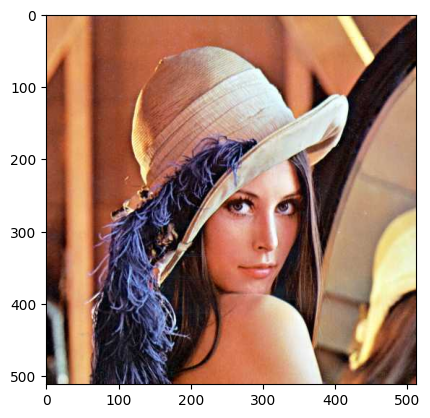

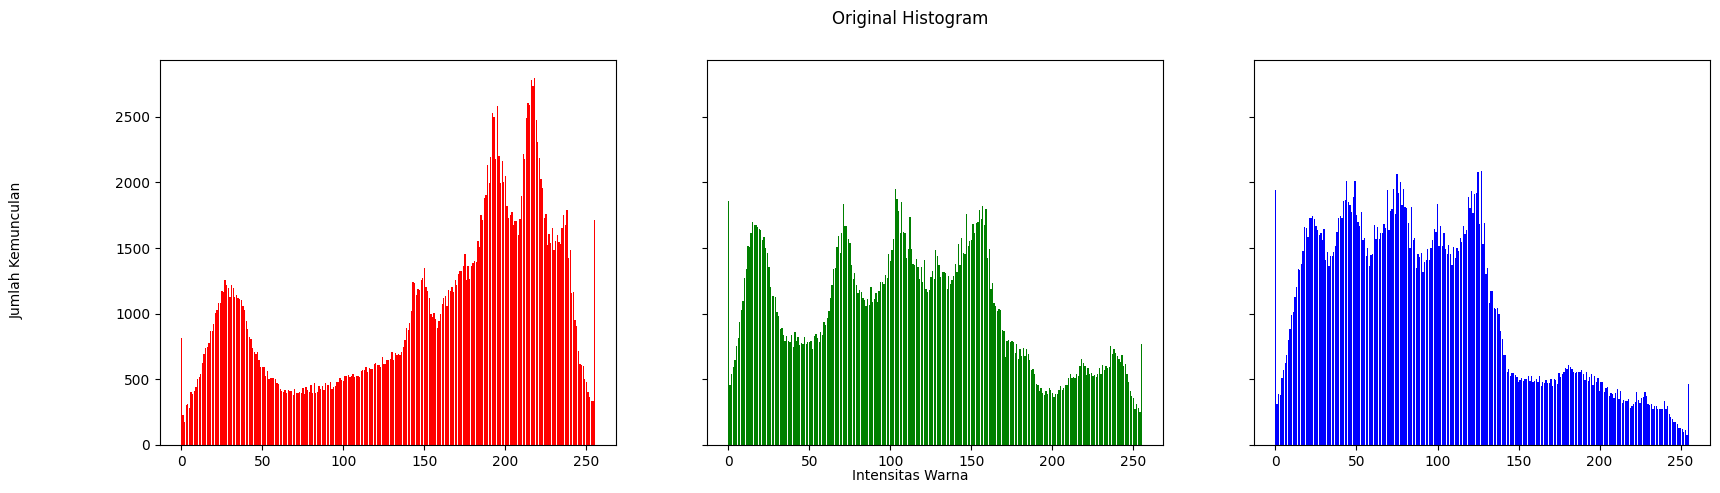

In [28]:
original_img = load_image('assets/lena.jpg')

plt.imshow(original_img)
plot_histogram(original_img, 'Original Histogram')

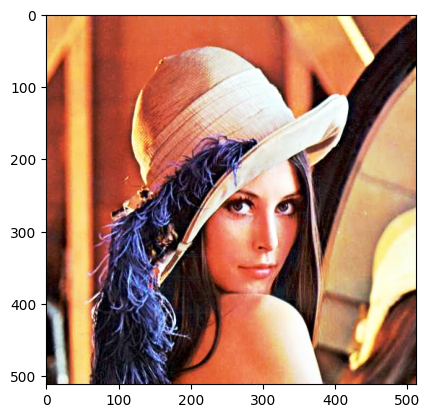

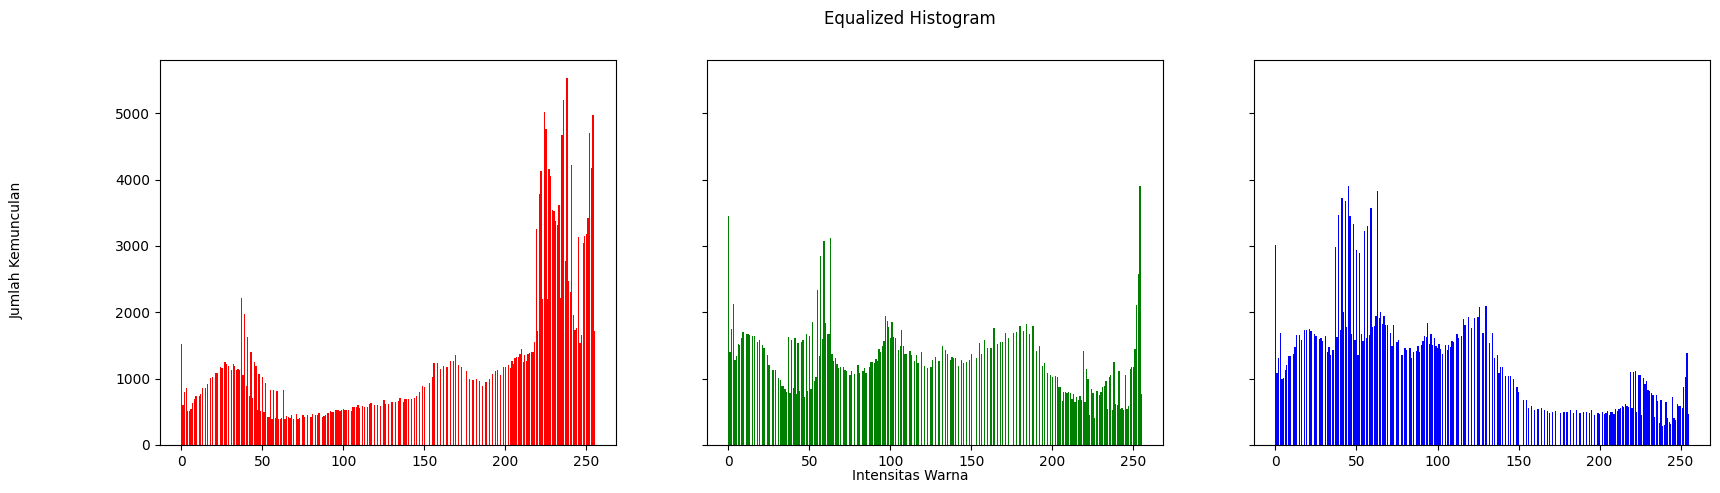

In [29]:
equalized_img = equalize_histogram(original_img)
plt.imshow(equalized_img)
plot_histogram(equalized_img, 'Equalized Histogram')

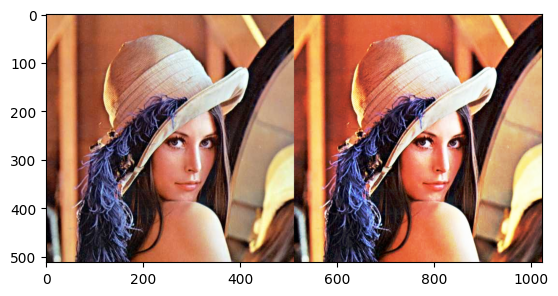

In [30]:
final_frame = cv2.hconcat([original_img, equalized_img])
plt.imshow(final_frame)

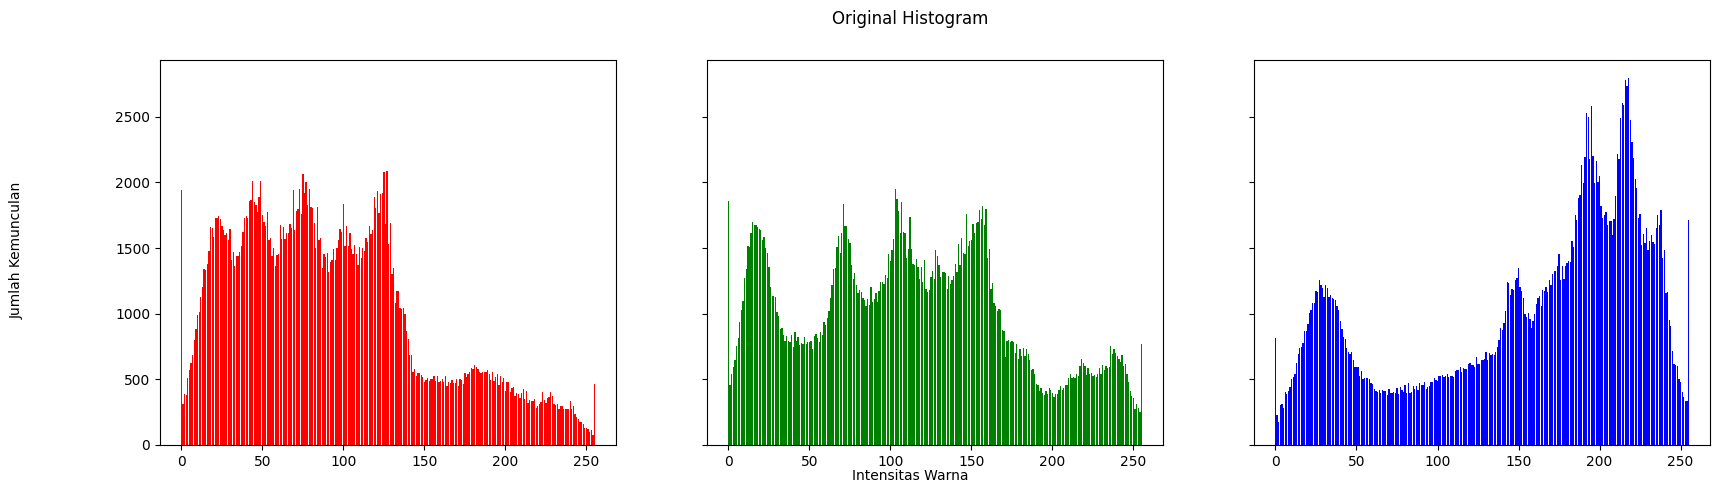

In [32]:
original_hist = compute_histogram(original_img)
plot_rgb_histogram(original_hist, 'Original Histogram')

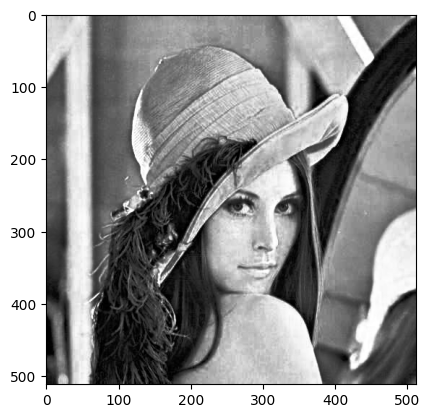

In [33]:
equalized_img = cv2.equalizeHist(original_img[:, :, 0])
equalized_img = cv2.merge([equalized_img] * 3)  # Convert to RGB
plt.imshow(equalized_img)

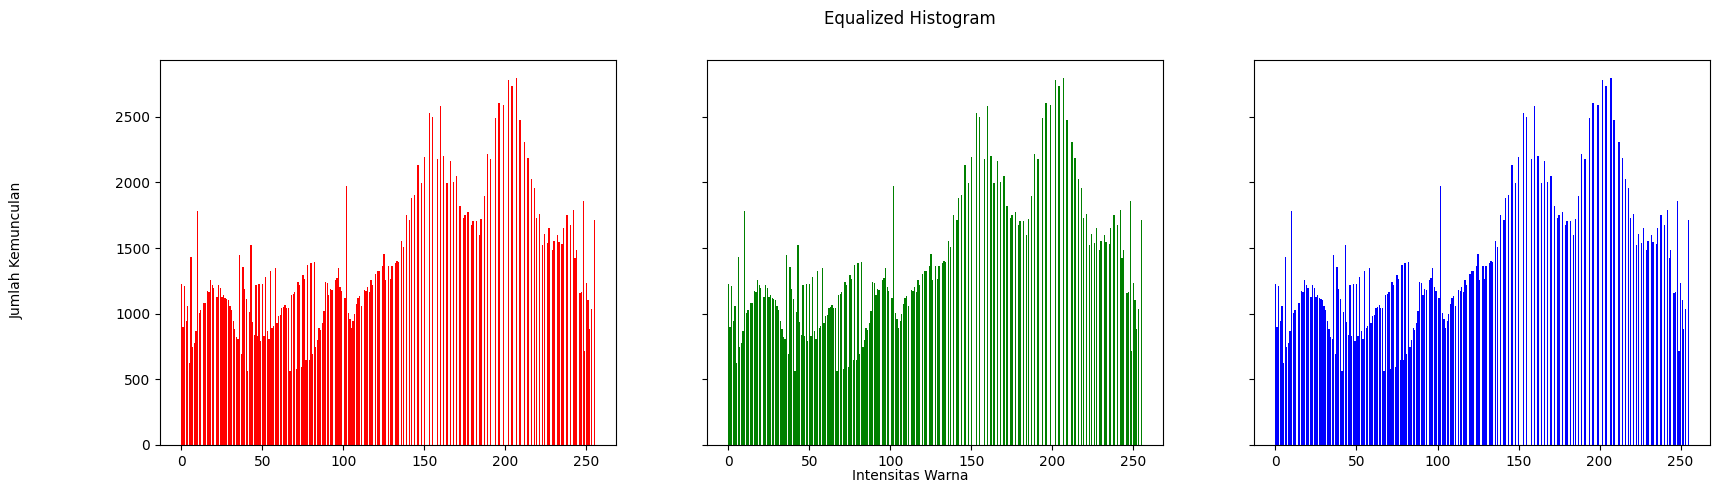

In [35]:
equalized_hist = compute_histogram(equalized_img)
plot_rgb_histogram(equalized_hist, 'Equalized Histogram')

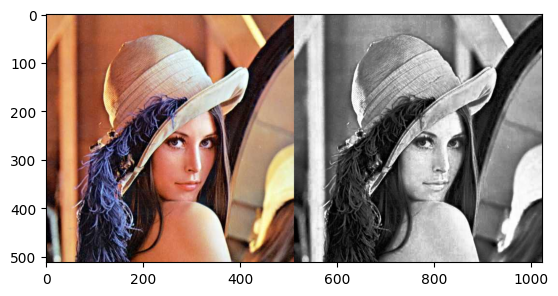

In [36]:
final_frame = cv2.hconcat([original_img, equalized_img])
plt.imshow(final_frame)

In [44]:
original_hist = histog(original_img)
equalized_img = equalize_histogram(original_img)
equalized_hist = histog(equalized_img)

<BarContainer object of 256 artists>

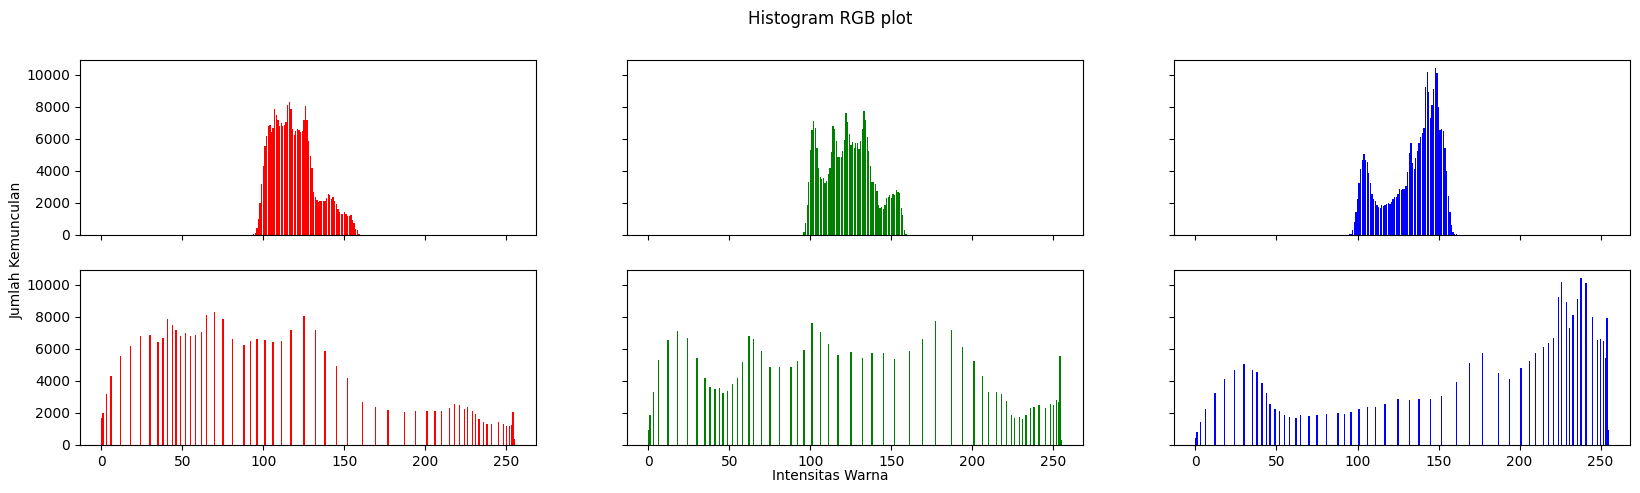

In [45]:
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0, 0].bar(names, original_hist[2], color='red')
axs[0, 1].bar(names, original_hist[1], color='green')
axs[0, 2].bar(names, original_hist[0], color='blue')
axs[1, 0].bar(names, equalized_hist[2], color='red')
axs[1, 1].bar(names, equalized_hist[1], color='green')
axs[1, 2].bar(names, equalized_hist[0], color='blue')

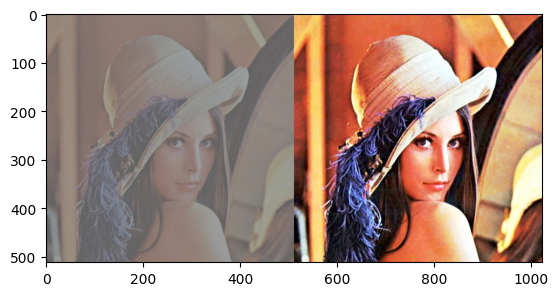

In [46]:
final_frame = cv2.hconcat([original_img, equalized_img])
plt.imshow(final_frame)

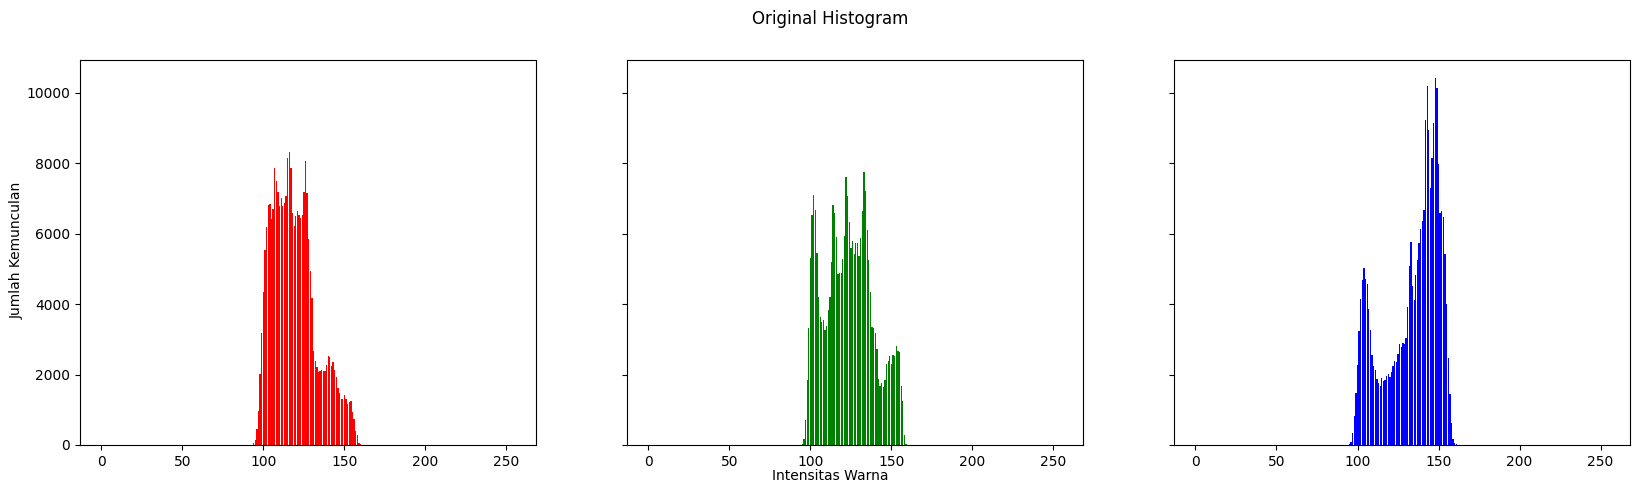

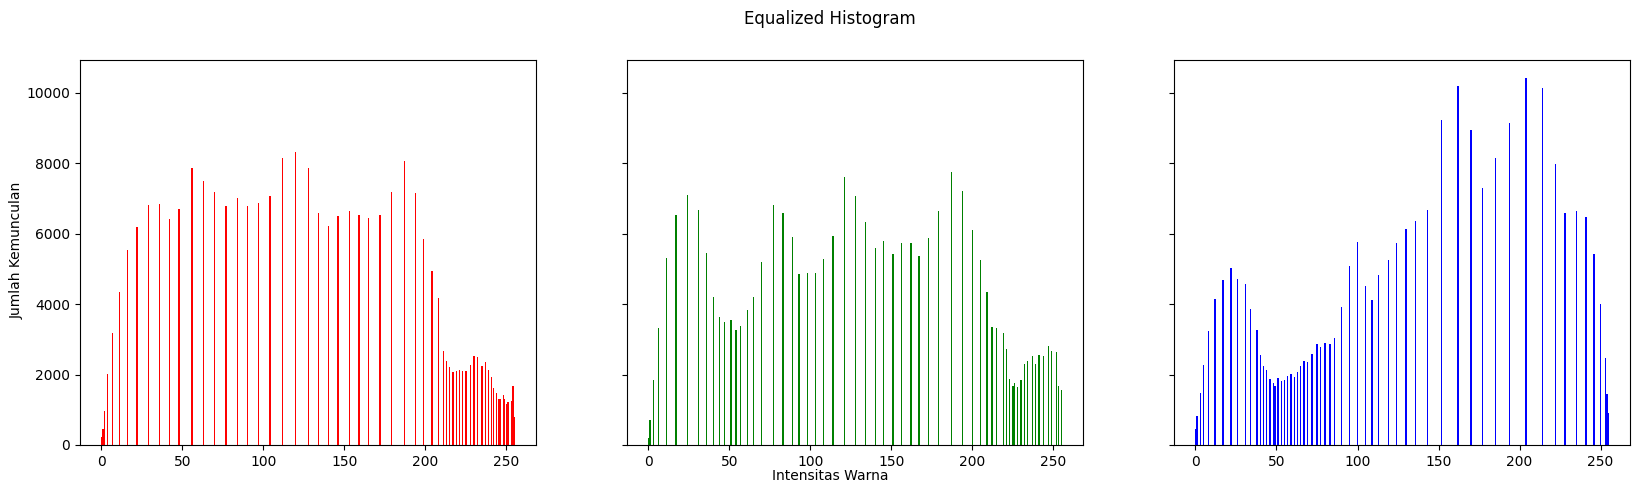

In [50]:
r, g, b = cv2.split(original_img)

r_eq = equalize_channel(r)
g_eq = equalize_channel(g)
b_eq = equalize_channel(b)

img_equalized = cv2.merge([r_eq, g_eq, b_eq])

original_hist = compute_histogram(original_img)
equalized_hist = compute_histogram(img_equalized)
plot_histogram(original_hist, 'Original Histogram')
plot_histogram(equalized_hist, 'Equalized Histogram')

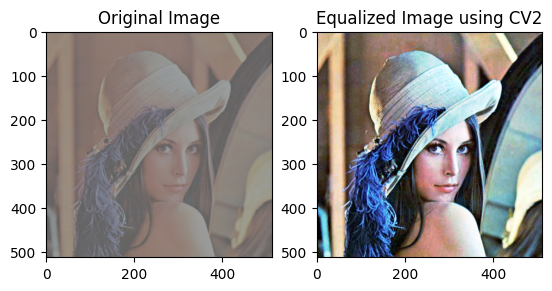

In [51]:
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(img_equalized)
plt.title("Equalized Image using CV2")

plt.show()

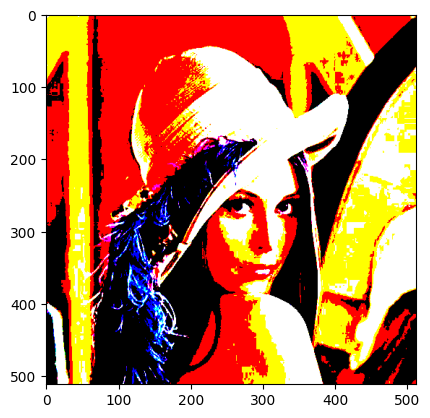

In [56]:
color_palette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]

result_image = convert_image_to_closest_colors(original_img, color_palette)

plt.imshow(result_image)
plt.show()

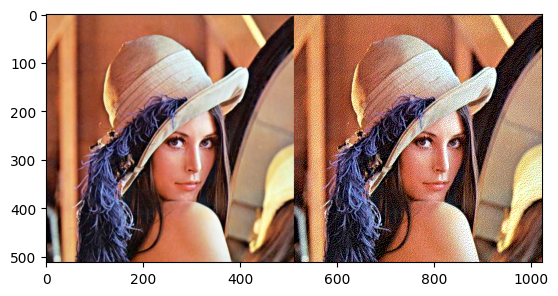

In [59]:
img = cv2.imread('./assets/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

output_img = floyd_steinberg_dithering(img)

final_frame = cv2.hconcat((img, output_img))
plt.imshow(final_frame)
plt.show()

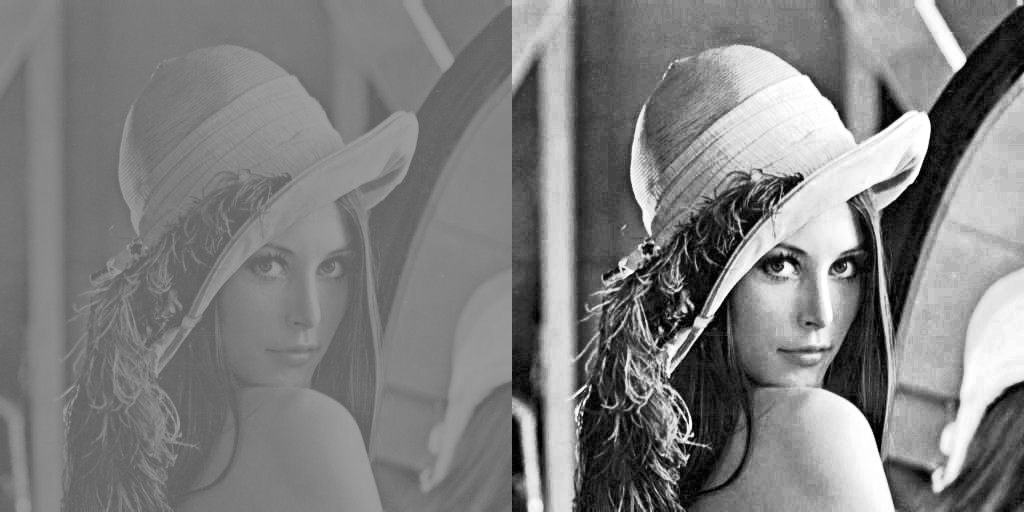

In [71]:
img_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
img_ori = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
img_equalized = cv2.equalizeHist(img_gray)
concatenated_img = cv2.hconcat([img_gray, img_equalized])
cv2_imshow(concatenated_img)

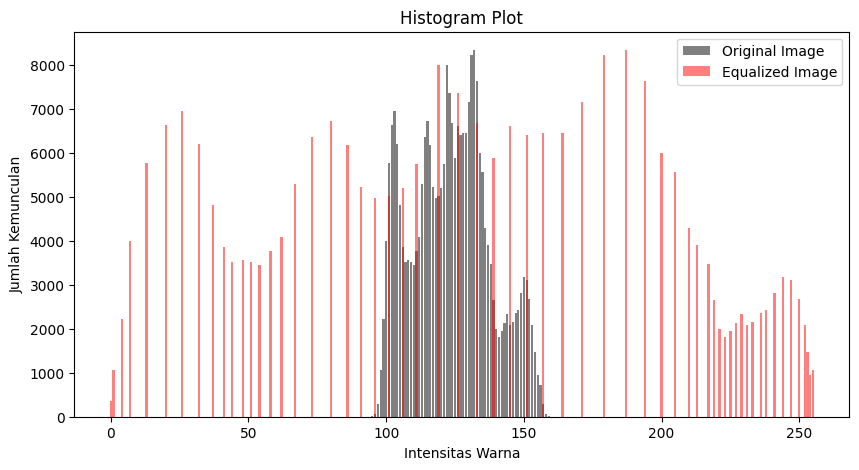

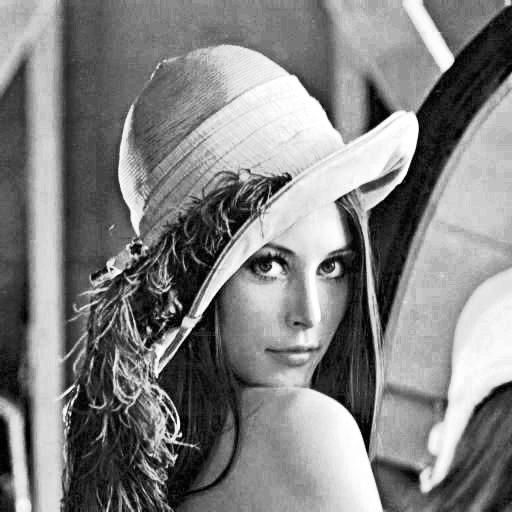

In [72]:
height, width = img_equalized.shape[0], img_equalized.shape[1]
dithered_image = np.copy(img_equalized)

dithered_img = floyd_steinberg_dithering(img_equalized.copy())

hist_np, bins_np = np.histogram(img_gray.flatten(), bins=256, range=[0, 256])
hist_eq, bins_eq = np.histogram(img_equalized.flatten(), bins=256, range=[0, 256])

names = np.arange(256)
plt.figure(figsize=(10,5))
plt.title('Histogram Plot')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.bar(names, hist_np, color='gray', label='Original Image')
plt.bar(names, hist_eq, color='red', alpha=0.5, label='Equalized Image')
plt.legend()
plt.show()

cv2_imshow(dithered_img)